# Credit card

## Reference 

In [97]:
# https://www.kaggle.com/datasets/arjunbhasin2013/ccdata

## Import library

In [137]:
import numpy as np
import pandas as pd
import re
from sklearn.cluster import KMeans, DBSCAN, HDBSCAN, AgglomerativeClustering, BisectingKMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

## Import dataset

In [99]:
path = 'https://raw.githubusercontent.com/notfakearcher/julian/main/02_data/credit_card_customers.csv'
credit_card = pd.read_csv(path)
credit_card.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


## Clean dataset 

In [100]:
# credit_card.info()
# remove the cust_id in dataframe
credit_card1 = credit_card.copy()
credit_card1 = credit_card1.dropna()
credit_card1 = credit_card1.drop(columns = 'CUST_ID')
credit_card1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8636 entries, 0 to 8949
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8636 non-null   float64
 1   BALANCE_FREQUENCY                 8636 non-null   float64
 2   PURCHASES                         8636 non-null   float64
 3   ONEOFF_PURCHASES                  8636 non-null   float64
 4   INSTALLMENTS_PURCHASES            8636 non-null   float64
 5   CASH_ADVANCE                      8636 non-null   float64
 6   PURCHASES_FREQUENCY               8636 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8636 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8636 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8636 non-null   float64
 10  CASH_ADVANCE_TRX                  8636 non-null   int64  
 11  PURCHASES_TRX                     8636 non-null   int64  
 12  CREDIT

In [101]:
credit_card1.isna().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

## Visualize the data

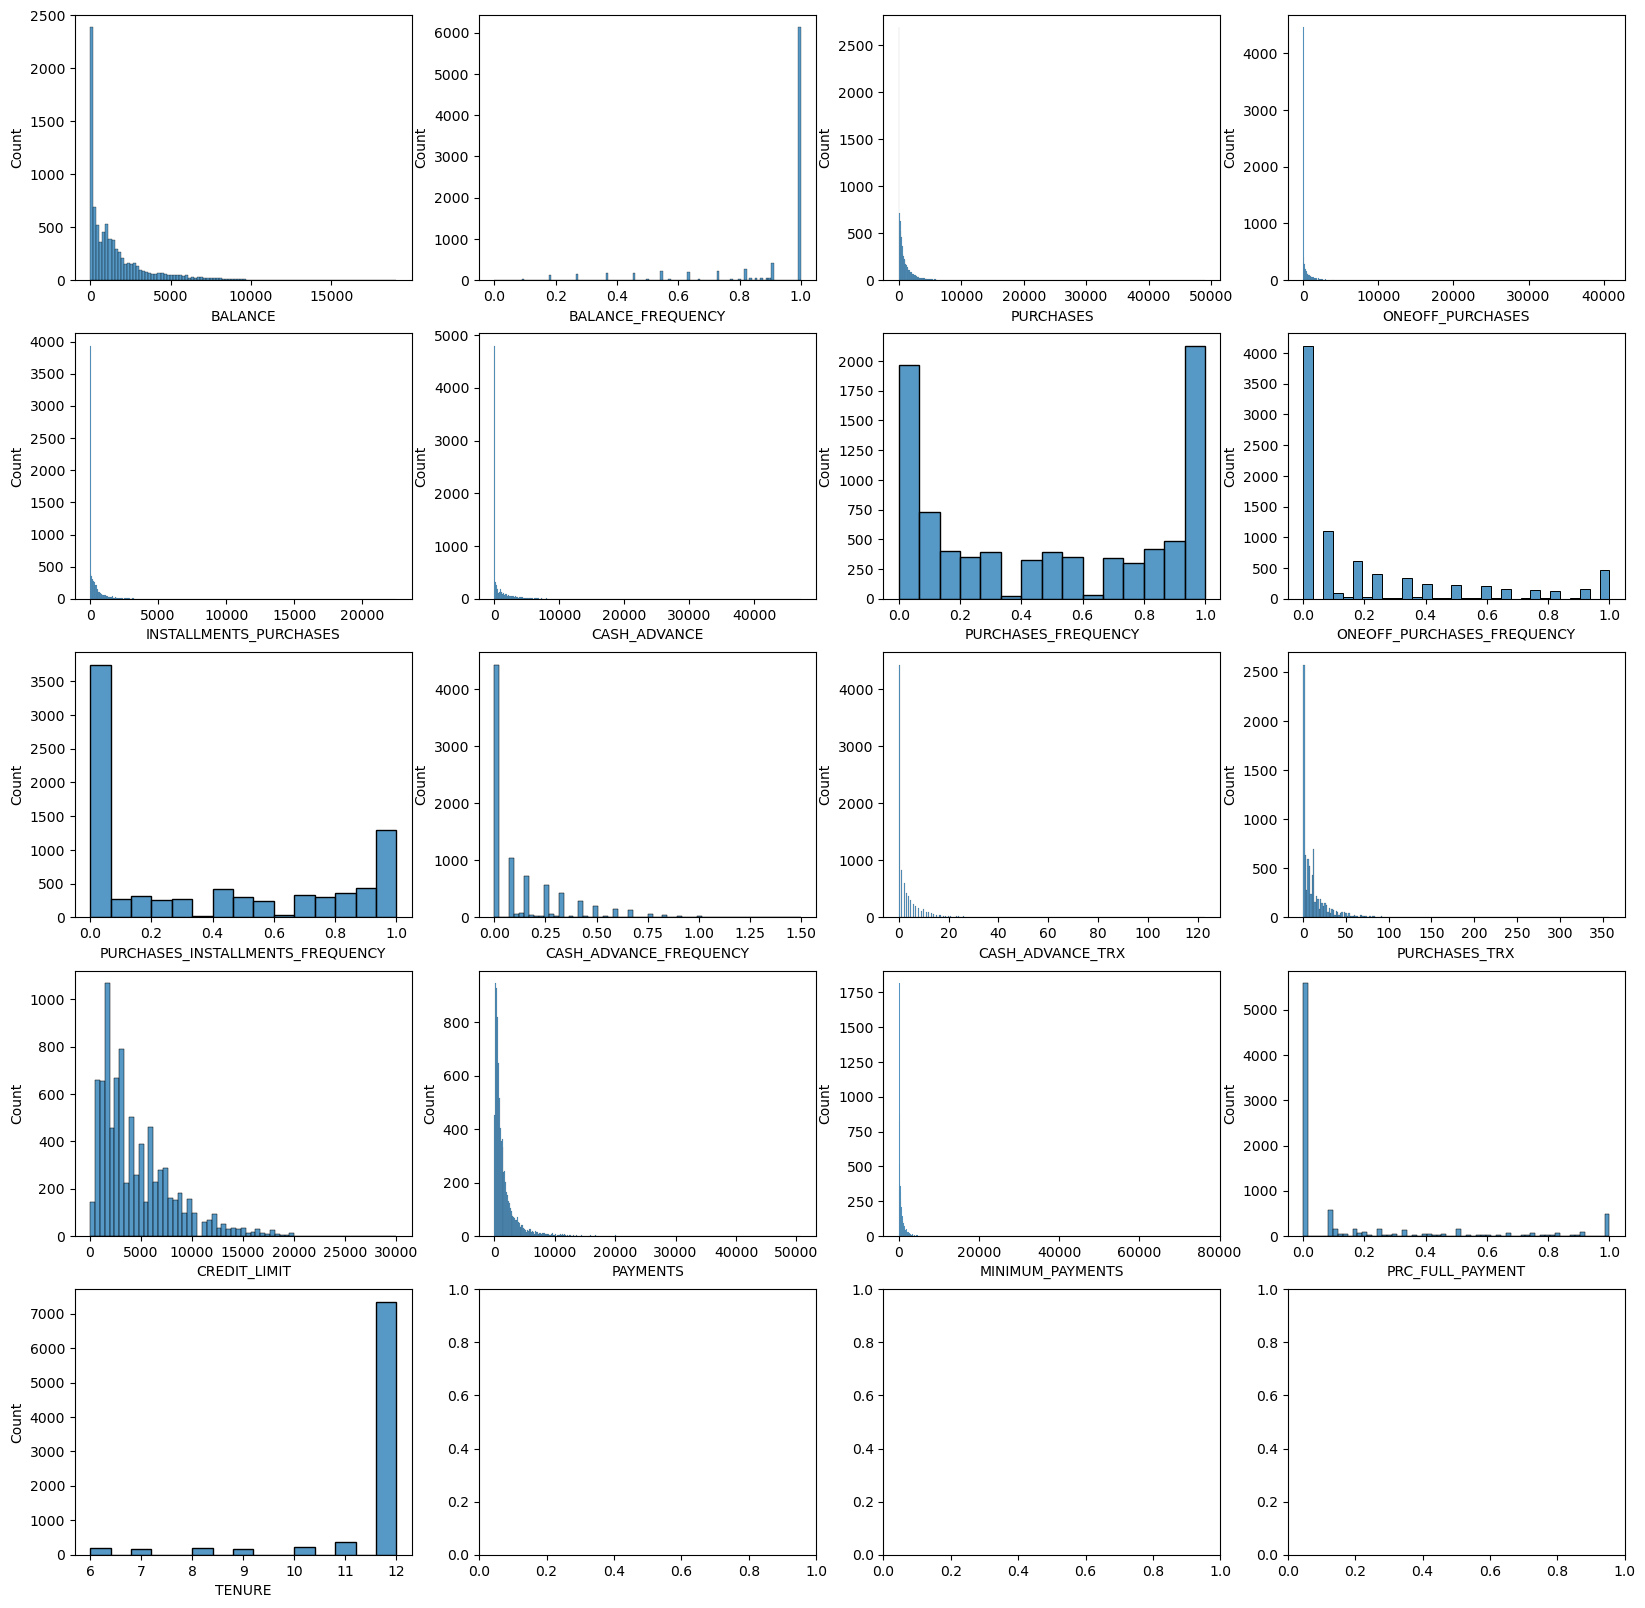

In [79]:
fig, axes = plt.subplots(nrows= 5, ncols= 4, figsize = (20, 20))
axes = np.ravel(axes)
for i, j in enumerate(credit_card1.columns):
  sns.histplot(ax= axes[i], data = credit_card1, x = j)

## Normalize the data

In [102]:
std = StandardScaler()
credit_card1.iloc[:,:]= std.fit_transform(credit_card1.iloc[:,:])

## PCA to deduce dimension of feature

In [116]:
# reduce feasture to 4 dimension
pca = PCA(n_components= 4, )
credit_card2 = pca.fit_transform(credit_card1)
pca.explained_variance_ratio_.sum()

0.6409742679267059

## Cluster

### Kmean++ 

In [145]:
# number of cluster 
nu_cluster = 4

In [146]:
kmean = KMeans(n_clusters = nu_cluster, init = 'k-means++', n_init= 10, max_iter= 300, tol = 0.0001)
kmean.fit(credit_card2)
# predict the cluster
predict_cluster = kmean.labels_
# centroid
centroid = kmean.cluster_centers_

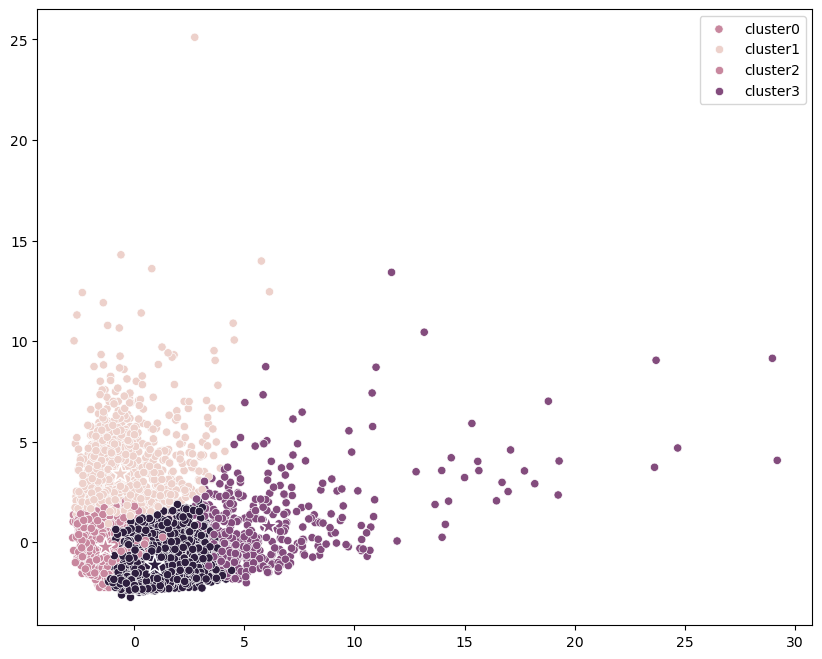

In [147]:
# plot cluster
# legend list
legend_list = ['cluster' + str(i) for i in np.unique(predict_cluster)]
fig, axes = plt.subplots(figsize = (10,8))
# plot clusters
sns.scatterplot( x = credit_card2[:,0], y = credit_card2[:,1], hue = predict_cluster)
# plot centroid
sns.scatterplot(x = centroid[:,0], y = centroid[:, 1], marker = '*',s = 200, hue = np.unique(predict_cluster) )
plt.legend(legend_list)
plt.show()

### Bisecting kmeans

In [150]:
bkmeans = BisectingKMeans(n_clusters = nu_cluster, init= 'k-means++', )
predict_cluster = bkmeans.fit_predict(credit_card2)

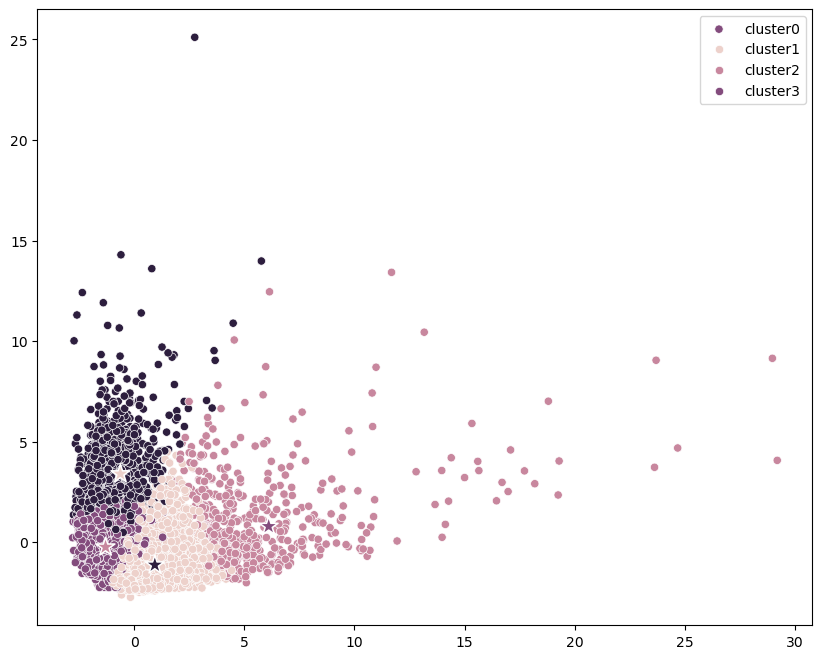

In [163]:
# plot cluster
# legend list
legend_list = ['cluster' + str(i) for i in np.unique(predict_cluster)]
fig, axes = plt.subplots(figsize = (10,8))
# plot clusters
sns.scatterplot( x = credit_card2[:,0], y = credit_card2[:,1], hue = predict_cluster)
# plot centroid
sns.scatterplot(x = centroid[:,0], y = centroid[:, 1], marker = '*',s = 200, hue = np.unique(predict_cluster) )
plt.legend(legend_list)
plt.show()

In [173]:
# sihouette plot function
def silhouette_plot(data, predict_label):
  # original y_lower and y_upper 
  si_core = silhouette_score(X = data, labels= predict_label)
  y_upper , y_lower = 0, 0 
  si_sample = silhouette_samples(X = data, labels= predict_label)
  for i in np.unique(predict_label):
    cond = predict_cluster == i
    si_sample_i = np.sort(si_sample[cond])
    y_upper = y_upper + len(si_sample_i) 
    plt.barh(y = range(y_lower, y_upper), width = si_sample_i, height = 1)
    y_lower = y_lower + len(si_sample_i)
  plt.axvline(x = si_core, linestyle = '--', c = 'r')
  plt.show()

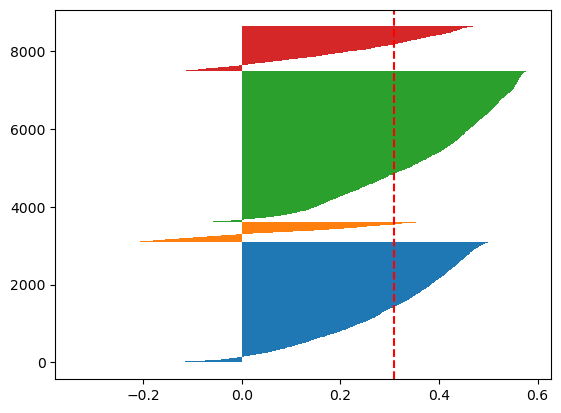

In [174]:
silhouette_plot(data = credit_card2, predict_label= predict_cluster)

### Hierarchical 